In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import plotly
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import math

In [12]:
path ='G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01/data_2020-01-01_00.csv'
cname = ["datetime", "route", "km", "direction", "all_units", "inflow_units", "outflow_unit", "samecell_units", "speed",
         "max_speed", "avg_traveltime", "max_traveltime"]
df = pd.read_csv(path,names=cname)
df

,datetime,route,km,direction,all_units,inflow_units,outflow_unit,samecell_units,speed,max_speed,avg_traveltime,max_traveltime
0,2020-01-01 00:00:44,1,19,in,0,0,1,0,0,0,0,0
1,2020-01-01 00:00:44,1,25,in,0,0,2,0,0,0,0,0
2,2020-01-01 00:00:44,1,25,out,0,0,2,0,0,0,0,0
3,2020-01-01 00:00:44,1,26,in,3,3,0,0,87,97,44,60
4,2020-01-01 00:00:44,1,26,out,3,3,0,0,87,97,44,60
...,...,...,...,...,...,...,...,...,...,...,...,...
241204,2020-01-01 00:59:07,3310,7,out,2,1,0,1,63,82,40,40
241205,2020-01-01 00:59:07,3310,8,in,1,0,3,1,72,72,0,0
241206,2020-01-01 00:59:07,3310,8,out,1,0,3,1,72,72,0,0
241207,2020-01-01 00:59:07,3310,9,in,2,2,0,0,52,53,60,60


In [33]:
path_jan = 'G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01/'
dfs = []
for file in glob.glob(path_jan+'data_2020-01-*.csv'):
    df = pd.read_csv(file,names=cname)
    df_ = df[(df['route']== 7) & (df['km'] == 1) & (df['direction'] == 'in')]
    print(file)
    dfs.append(df_)

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_10.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_19.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_18.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_22.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_20.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_21.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-31_17.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-29_02.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-29_04.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-28_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-29_01.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-28_21.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-28_22.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-28_19.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-28_17.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_08.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_07.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_06.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_05.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_04.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-24_22.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-26_01.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-24_08.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_08.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_09.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_06.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_05.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_04.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-22_21.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-23_02.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-22_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_06.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_07.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_05.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_12.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_10.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-19_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_01.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-20_09.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_15.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_13.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-16_15.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_11.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_09.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_10.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_12.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-17_08.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_16.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_15.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_14.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_17.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_12.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_13.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_11.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-14_09.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_17.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_21.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_20.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_16.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_15.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_19.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_12.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-11_08.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-09_00.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_20.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_22.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_17.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_19.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_18.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-08_15.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-06_04.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-06_03.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-05_14.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-06_00.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-05_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-06_01.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-06_02.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-05_21.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_11.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-02_22.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_05.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_06.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_03.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-02_23.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_02.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvgrhsUE0PSUQlV/TC_Research/Cell_Data/2020/2020-01\data_2020-01-03_00.csv
G:/.shortcut-targets-by-id/1BMwGDvpAqVWZD7P9pYvg

In [34]:
df = pd.concat(dfs)

In [35]:
df

,datetime,route,km,direction,all_units,inflow_units,outflow_unit,samecell_units,speed,max_speed,avg_traveltime,max_traveltime
4185,2020-01-31 10:00:26,7,1,in,5,5,0,0,76,100,56,66
16084,2020-01-31 10:01:39,7,1,in,5,3,0,2,79,103,38,51
27958,2020-01-31 10:02:01,7,1,in,1,1,0,0,91,91,30,30
39750,2020-01-31 10:03:12,7,1,in,8,8,0,0,69,88,55,90
51596,2020-01-31 10:04:26,7,1,in,3,1,0,2,59,84,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...
222722,2020-01-01 00:55:13,7,1,in,4,4,0,0,96,121,37,60
226861,2020-01-01 00:56:12,7,1,in,6,6,0,0,75,119,40,61
231038,2020-01-01 00:57:11,7,1,in,2,2,0,0,77,88,54,60
234954,2020-01-01 00:58:10,7,1,in,1,1,0,0,114,114,30,30


In [54]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [55]:
# sort data by datetime
df = df.sort_values(by=['datetime'])

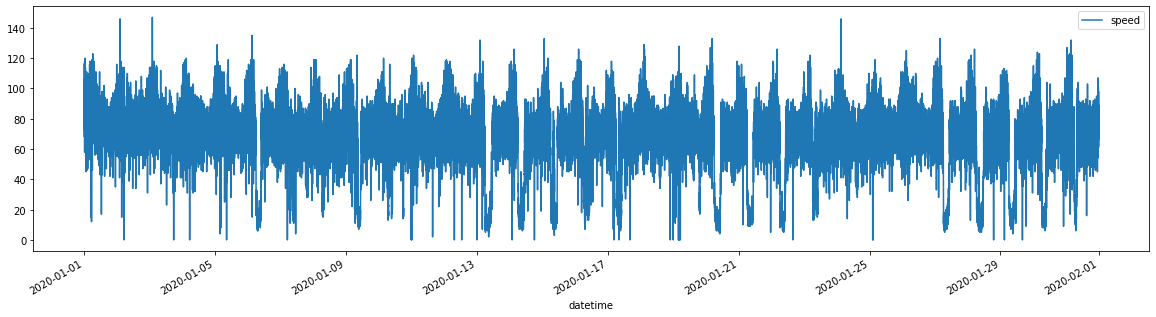

In [56]:
df.plot(x='datetime',y='speed',kind='line',figsize=(20,5))

In [61]:
# we want to predict the speed in the next 10 minutes
df1 = df.groupby(pd.Grouper(key="datetime", freq="10min")).mean()

In [63]:
df1.head()

,route,km,all_units,inflow_units,outflow_unit,samecell_units,speed,max_speed,avg_traveltime,max_traveltime
datetime,,,,,,,,,,
2020-01-01 00:00:00,7.0,1.0,2.750000,2.375000,0.0,0.375000,87.125000,101.875000,45.000000,58.125000
2020-01-01 00:10:00,7.0,1.0,2.000000,2.000000,0.0,0.000000,91.222222,104.333333,43.111111,50.000000
2020-01-01 00:20:00,7.0,1.0,2.900000,2.800000,0.0,0.100000,90.700000,103.900000,40.100000,46.400000
2020-01-01 00:30:00,7.0,1.0,2.666667,2.555556,0.0,0.111111,81.444444,95.000000,39.555556,49.111111
2020-01-01 00:40:00,7.0,1.0,2.777778,2.444444,0.0,0.333333,88.000000,107.222222,35.666667,41.888889
...,...,...,...,...,...,...,...,...,...,...
2020-01-31 23:10:00,7.0,1.0,4.333333,3.777778,0.0,0.555556,78.111111,104.222222,45.222222,57.111111
2020-01-31 23:20:00,7.0,1.0,4.600000,4.500000,0.0,0.100000,78.900000,95.400000,49.400000,67.700000
2020-01-31 23:30:00,7.0,1.0,4.800000,4.500000,0.0,0.300000,80.800000,100.200000,50.900000,61.400000


### now we can see that our dataset is in 10 mins intervals

In [64]:
# plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.plot({
    "data": [Scatter(x=df1.index, y=df1['speed'])],
    "layout": Layout(title="speed over time")
})

'temp-plot.html'

In [68]:
# normalize dataset by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
speed = df['speed'].values.astype("float32").reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(speed)

In [69]:
dataset

array([[0.7891156 ],
       [0.56462586],
       [0.50340134],
       ...,
       [0.414966  ],
       [0.60544217],
       [0.5986394 ]], dtype=float32)

In [70]:
# Split dataset into 60% training and 40% testing
TRAIN_SIZE = 0.60
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (26235, 17491)


In [71]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [74]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(26233, 1)
New training data shape:
(26233, 1, 1)


In [82]:
# create LSTM and fit model
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(64, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    history = model.fit(train_X, 
              train_Y, 
              epochs = 30, 
              batch_size = 1, 
              verbose = 2,
              callbacks=[tensorboard_callback])
    
    return(model)

# Fit model
model = fit_model(train_X, train_Y, window_size)

Epoch 1/30
26233/26233 - 82s - loss: 0.0088
Epoch 2/30
26233/26233 - 81s - loss: 0.0074
Epoch 3/30
26233/26233 - 77s - loss: 0.0074
Epoch 4/30
26233/26233 - 78s - loss: 0.0073
Epoch 5/30
26233/26233 - 77s - loss: 0.0073
Epoch 6/30
26233/26233 - 82s - loss: 0.0073
Epoch 7/30
26233/26233 - 79s - loss: 0.0073
Epoch 8/30
26233/26233 - 78s - loss: 0.0073
Epoch 9/30
26233/26233 - 78s - loss: 0.0073
Epoch 10/30
26233/26233 - 78s - loss: 0.0073
Epoch 11/30
26233/26233 - 78s - loss: 0.0073
Epoch 12/30
26233/26233 - 77s - loss: 0.0073
Epoch 13/30
26233/26233 - 77s - loss: 0.0073
Epoch 14/30
26233/26233 - 78s - loss: 0.0073
Epoch 15/30
26233/26233 - 82s - loss: 0.0073
Epoch 16/30
26233/26233 - 79s - loss: 0.0072
Epoch 17/30
26233/26233 - 82s - loss: 0.0072
Epoch 18/30
26233/26233 - 84s - loss: 0.0071
Epoch 19/30
26233/26233 - 78s - loss: 0.0070
Epoch 20/30
26233/26233 - 79s - loss: 0.0070
Epoch 21/30
26233/26233 - 78s - loss: 0.0070
Epoch 22/30
26233/26233 - 78s - loss: 0.0069
Epoch 23/30
26233/2

In [85]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [97]:
!rm -rf ./logs/

In [98]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17588), started 0:12:57 ago. (Use '!kill 17588' to kill it.)

In [105]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 12.18 RMSE
Test data score: 11.75 RMSE


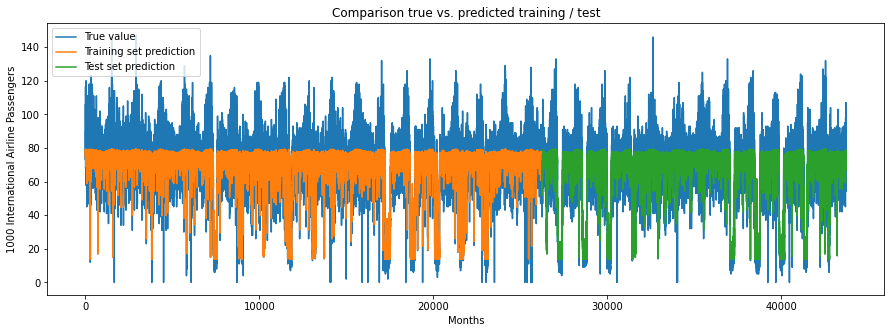

In [106]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("1speed")
plt.title("Evaluate true/predicted training and test set")
plt.legend()
plt.show()